# How Can Bellabeat Play It Smart?

<img src= "https://mk0bellabeatcomhqlip.kinstacdn.com/wp-content/uploads/2020/10/bb_31.jpg" style='width: 800px;'>

## Introduction
Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. The cofounder and CCO of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I will focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. 

# 1. ASK

## Questions

* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

## Business Requirements
Identify possible growth opportunities and make recommendations for improving the Bellabeat marketing strategy based on smart device usage data.

## Key Stakeholders
1. Primary stakeholders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.

* Sando Mur: Mathematician and Bellabeat’s cofounder.

2. Secondary stakeholders
* Bellabeat marketing analytics team

# 2. PREPARE

## Preparation of data

### Data sources
* FitBit Fitness Tracker Data (https://www.kaggle.com/arashnic/fitbit)

* (CC0: Public Domain, dataset made available through Mobius)
* This Kaggle data set contains personal fitness tracker from 30 fitbit users. 30 eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 
* It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

## Environment Preparation

In [1]:
## Necessary Packages
install.packages("tidyverse")
library(tidyverse)
install.packages("lubridate")
library(lubridate)


## Data Cleaning Packages

install.packages("here")
library(here)

install.packages("skimr")
library(skimr)

install.packages("janitor")
library(janitor)

install.packages("dplyr")
library(dplyr)

## Data Plotting Packages

install.packages("ggplot2")
library(ggplot2)
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

here() starts at /kaggle/working

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The fo

# 3. PROCESS

## Importing Datasets

* Daily activity
* Dailty calories
* Sleep information
* Weight information

In [2]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
sleep_info <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_info <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

## Data Inspection

In [3]:
head(daily_activity)
glimpse(daily_activity)
n_distinct(daily_activity$Id)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

[1] 33

In [4]:
head(daily_calories)
glimpse(daily_calories)
n_distinct(daily_calories$Id)

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


[1] 33

In [5]:
head(sleep_info)
glimpse(sleep_info)
n_distinct(sleep_info$Id)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


[1] 24

In [6]:
head(weight_info)
glimpse(weight_info)
n_distinct(weight_info$Id)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


[1] 8

* There are 33 IDs in daily activity/calories tracking data.
* There are only 24 IDs in the sleep data.
* There are only 8 IDs in the weight data.

## Summary Statistics for data frames selected

In [7]:
daily_activity %>%
  select(TotalDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  summary()

daily_calories %>%
  select(Calories) %>%
  summary()

sleep_info %>%
  select(TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

weight_info %>%
  select(WeightKg, BMI, IsManualReport) %>%
  summary()

 TotalDistance    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   : 0.000   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median : 5.245   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 5.490   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 7.713   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :28.030   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes
 Min.   :   0.0  
 1st Qu.: 729.8  
 Median :1057.5  
 Mean   : 991.2  
 3rd Qu.:1229.5  
 Max.   :1440.0  

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

    WeightKg           BMI        IsManualReport    
 Min.   : 52.60   Min.   :21.45   Length:67         
 1st Qu.: 61.40   1st Qu.:23.96   Class :character  
 Median : 62.50   Median :24.39   Mode  :character  
 Mean   : 72.04   Mean   :25.19                     
 3rd Qu.: 85.05   3rd Qu.:25.56                     
 Max.   :133.50   Max.   :47.54                     

## Findings
* The average total distance per day covered by participants was 5.490 miles
* The users do more light activities with an average of 192.8 minutes, approx. = 3.2 hours per day.
* The average minutes of sedentary minutes per day was 991.2 minutes, approx. = 16.5 hours.
* The average number of calories consumed per day was 2,304 cal.
* The average minutes of sleep per day was 419.5 minutes, approx. = 7 hours.
* The average minutes of time in bed per day was 458.6 minutes, approx. = 7 hours & 38.6 minutes.
* The average weight was 72.04 Kg.
* The average BMI was 25.19.

,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
VeryActiveDistance,1.0,0.2,0.2,0.0,0.8,0.2,0.1,-0.1,0.5
ModeratelyActiveDistance,0.2,1.0,0.2,0.0,0.2,0.9,0.2,-0.2,0.2
LightActiveDistance,0.2,0.2,1.0,0.1,0.2,0.2,0.9,-0.4,0.5
SedentaryActiveDistance,0.0,0.0,0.1,1.0,0.0,0.0,0.1,0.0,0.0
VeryActiveMinutes,0.8,0.2,0.2,0.0,1.0,0.3,0.1,-0.2,0.6
FairlyActiveMinutes,0.2,0.9,0.2,0.0,0.3,1.0,0.1,-0.2,0.3


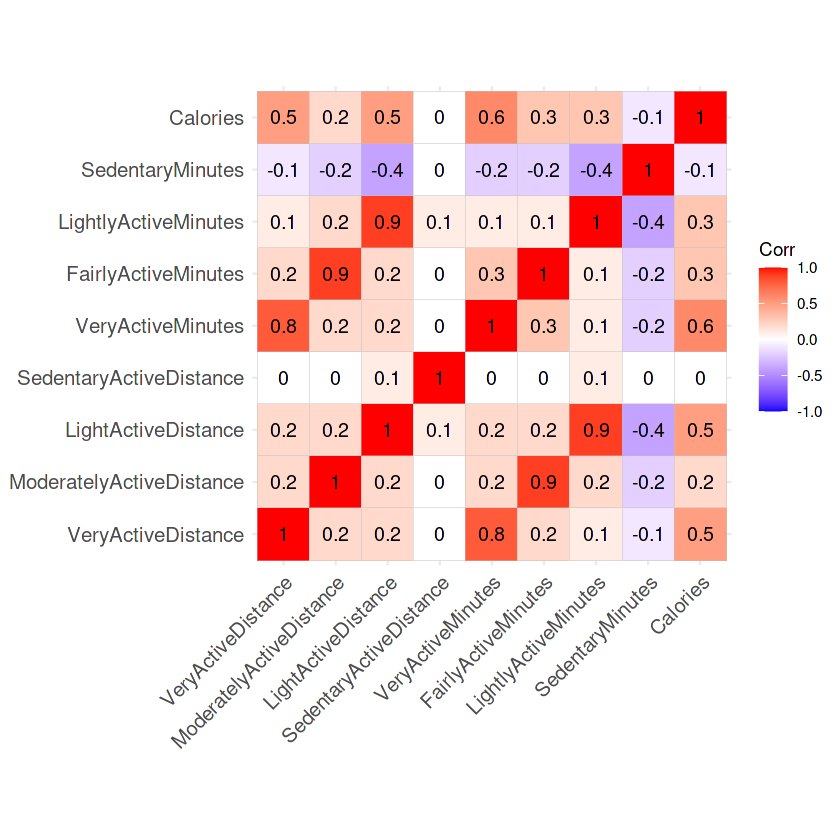

In [8]:
# Heat Map to find the correlation of tracked variables in the daily activities

corr_var <- daily_activity %>% 
  select(c(7:15)) 
  
corr_matrix_var <- round(cor(corr_var), 1)
head(corr_matrix_var)

ggcorrplot(corr_matrix_var, lab = TRUE)

In order to burn more calories, light active distance is more beneficial than moderately active distance.

The sedentary minutes has a negative correlation with calories burnt, so people must limit their time spent being sedentary.

## Limitation of data
* The group consists of 30 people who were recruited over the course of 30 days in 2016. As a result, the source is out of date, and the sample size is insufficient for proper analysis. 
* There is no demographic information to ensure that the data is reflective of Bellabeat's intended audience of female users.

## Data Cleaning

In [9]:
# Fixing daily_activity date (mdy format) and daily_sleep (mdy_hms) format to be (ymd) formats.
daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%m/%d/%y")
# sleep
sleep_info$SleepDay=as.POSIXct(sleep_info$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep_info$date <- format(sleep_info$SleepDay, format = "%m/%d/%y")

In [10]:
# double checking
head(daily_activity)
head(sleep_info)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


In [11]:
# Merging daily_activity and sleep_info data frames
combined_data <- merge(sleep_info, daily_activity, by="Id", all=TRUE)

In [12]:
# Double check
head(combined_data)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date.x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,⋯,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date.y
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<dttm>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16,2016-05-07,11992,7.71,7.71,⋯,2.46,2.12,3.13,0,37,46,175,833,1821,05/07/16
2,1503960366,2016-04-12,1,327,346,04/12/16,2016-05-06,12159,8.03,8.03,⋯,1.97,0.25,5.81,0,24,6,289,754,1896,05/06/16
3,1503960366,2016-04-12,1,327,346,04/12/16,2016-05-01,10602,6.81,6.81,⋯,2.29,1.60,2.92,0,33,35,246,730,1820,05/01/16
4,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-30,14673,9.25,9.25,⋯,3.56,1.42,4.27,0,52,34,217,712,1947,04/30/16
5,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-12,13162,8.50,8.50,⋯,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
6,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-13,10735,6.97,6.97,⋯,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16


In [13]:
#Adding a new column with total avtive minutes
total_daily_activity <- daily_activity %>% 
  mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

#Verify that colmn was added

str(total_daily_activity)

'data.frame':	940 obs. of  17 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 8

In [14]:
# Grouping of minutes slept and calories data for easier analysis 
combined_data <- combined_data %>%
  mutate(sleep_categories = case_when(
    TotalMinutesAsleep > 360 & TotalMinutesAsleep <= 480 ~ "6-8h",
    TotalMinutesAsleep > 480 ~ "> 8h",
    TRUE ~ "< 6h"
  ))

combined_data <- combined_data %>%
  mutate(calorie_categories = case_when(
    Calories > 1500 & Calories <= 2500 ~ "1500 - 2500",
    Calories > 2500 ~ "> 2500",
    TRUE ~ "< 1500"
  ))

In [15]:
# Double checking
head(combined_data)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date.x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,⋯,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date.y,sleep_categories,calorie_categories
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>,<dttm>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16,2016-05-07,11992,7.71,7.71,⋯,3.13,0,37,46,175,833,1821,05/07/16,< 6h,1500 - 2500
2,1503960366,2016-04-12,1,327,346,04/12/16,2016-05-06,12159,8.03,8.03,⋯,5.81,0,24,6,289,754,1896,05/06/16,< 6h,1500 - 2500
3,1503960366,2016-04-12,1,327,346,04/12/16,2016-05-01,10602,6.81,6.81,⋯,2.92,0,33,35,246,730,1820,05/01/16,< 6h,1500 - 2500
4,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-30,14673,9.25,9.25,⋯,4.27,0,52,34,217,712,1947,04/30/16,< 6h,1500 - 2500
5,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-12,13162,8.50,8.50,⋯,6.06,0,25,13,328,728,1985,04/12/16,< 6h,1500 - 2500
6,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-13,10735,6.97,6.97,⋯,4.71,0,21,19,217,776,1797,04/13/16,< 6h,1500 - 2500


In [16]:
# Finding duplicates
sum(duplicated(daily_activity))
sum(duplicated(daily_calories))
sum(duplicated(sleep_info))
sum(duplicated(weight_info))



[1] 0

[1] 0

[1] 3

[1] 0

# 4. ANALYSIS
# AND
# 5. SHARE

## Data Visualization

### 1. How paricipants record their data

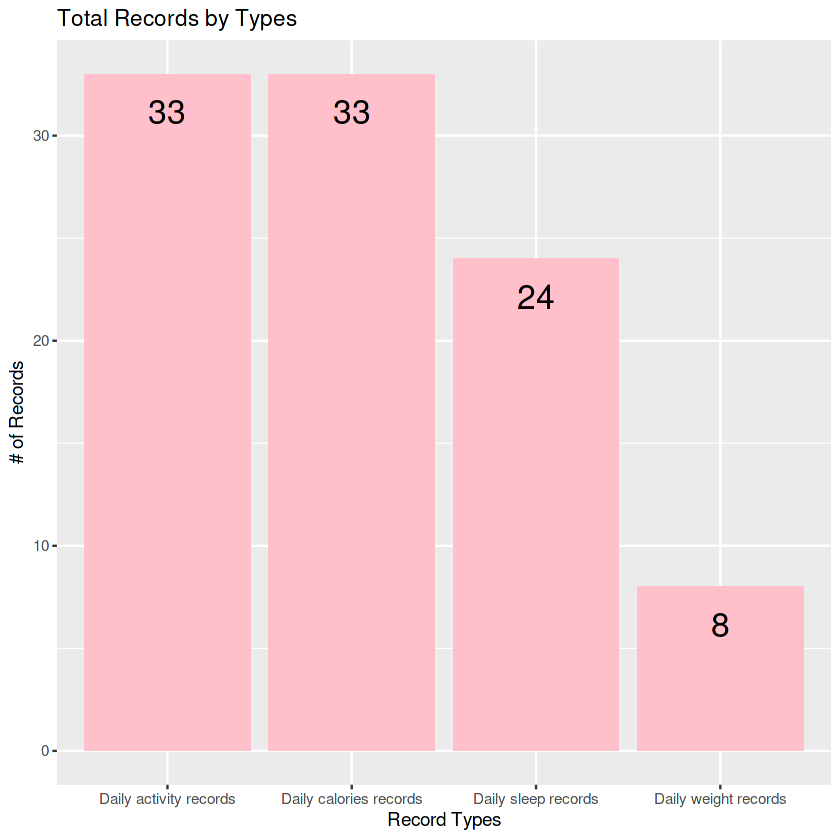

In [17]:
#Counting types from the original dataset
recording_type <- c("Daily activity records","Daily sleep records", "Daily calories records", "Daily weight records")
recording_number <-c(n_distinct(daily_activity$Id),n_distinct(sleep_info$Id), n_distinct(daily_calories$Id), n_distinct(weight_info$Id))
recording_count <- data.frame(recording_type,recording_number)
  
# Plotting a graph
ggplot(recording_count, aes(recording_type,recording_number)) +
  geom_bar(stat= "identity", fill="pink")+ 
  geom_text(aes(label=recording_number), color="black", size=7, vjust=2)+
  labs(title="Total Records by Types",  x= "Record Types", y="# of Records")

### Findings:
* 33 participants recorded daily activities and calories.
* 24 participants recorded daily sleep.
* 8 participants only recorded weight.

### 2. Comparing Auto reporting vs Manual reporting among participants who recorded their weight 

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


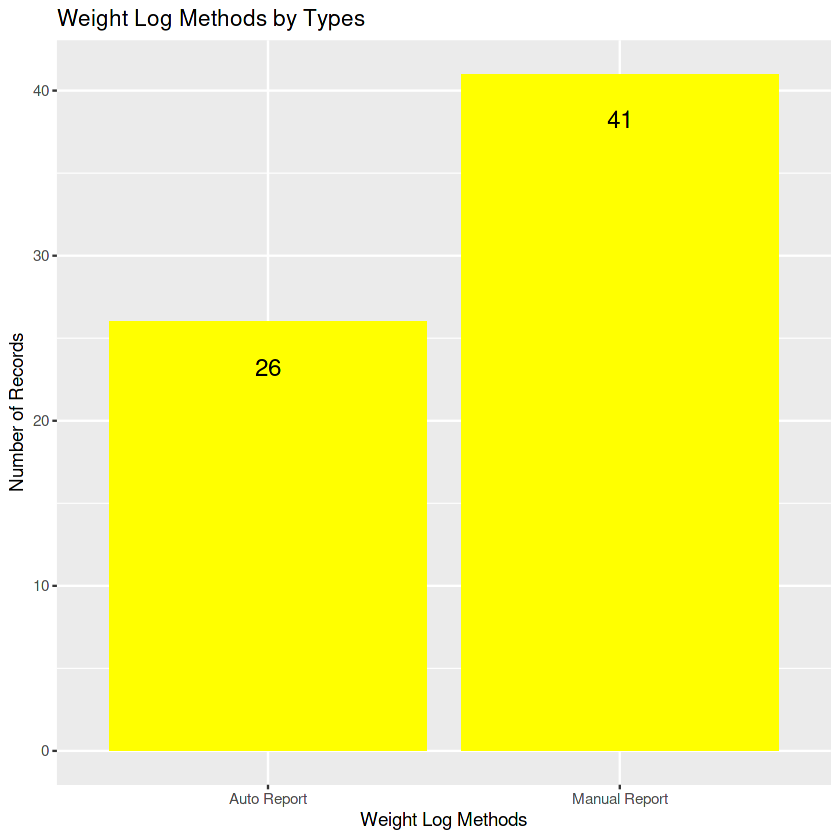

In [18]:
# Converting weight_info "IsManualReport" coulmn into from chr to logical
weight_info_logic <- type_convert(weight_info, 
            col_types = cols(IsManualReport = col_logical()
                            ))
        
# Double checking
str(weight_info_logic)

report_method <- c("Auto Report","Manual Report")
report_method_TF <- c(length(which(weight_info_logic$IsManualReport =="FALSE")),length(which(weight_info_logic$IsManualReport =="TRUE")))
check_manual_report <- data.frame(report_method,report_method_TF)

#Plotting a graph
ggplot(check_manual_report, aes(report_method,report_method_TF)) +
  geom_bar(stat= "identity",fill="yellow")+ 
  geom_text(aes(label=report_method_TF), vjust=3, color="black", size=5)+
  labs(title="Weight Log Methods by Types",  x= "Weight Log Methods", y="Number of Records")

* In the weight info dataset, there are 41 records were created manually, and 26 records were automatically recorded. Since the participants numbers were small (33 only) which is not a big number to give signinfacen.
* We need a bigger dataset to be able to know why participants didn't record the daily sleep and weight records daily as they recorded the daily activities.

### 3. Relation between staying in bed and total minutes of sleeping

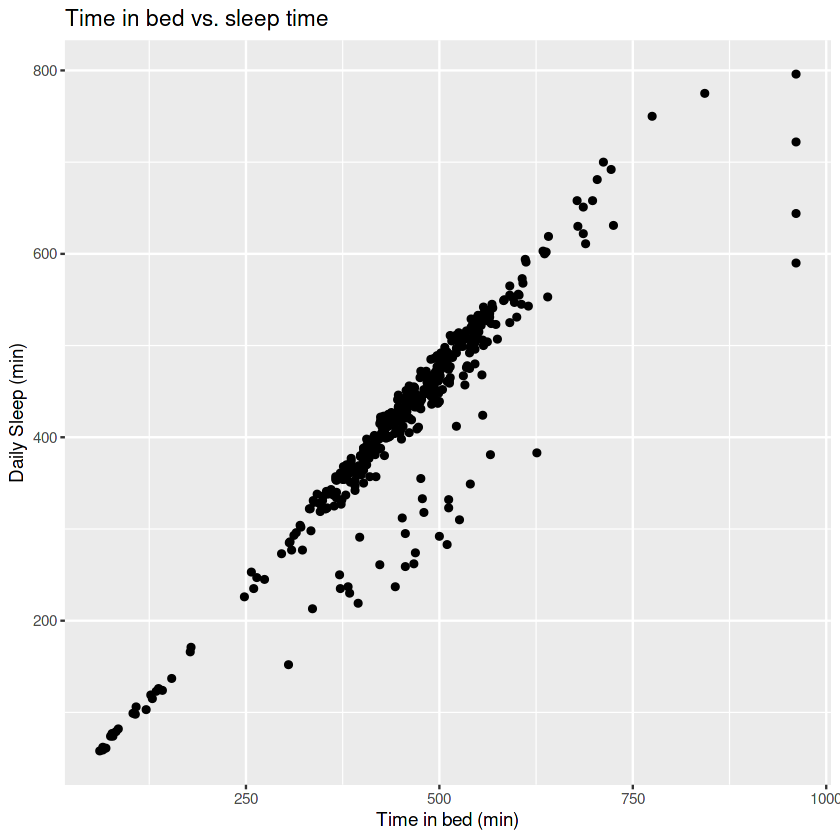

In [19]:
# Plotting a graph to know the relationship between total minutes in bed vs sleeping
ggplot(data = sleep_info) +
  geom_point(mapping = aes(x = TotalTimeInBed, y = TotalMinutesAsleep)) + 
  labs(title = "Time in bed vs. sleep time", x = "Time in bed (min)", y = "Daily Sleep (min)")

### Findings:
* The longer a user was in bed, the longer the sleep duration.

### 4. Relationship between daily activities and calories burned.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



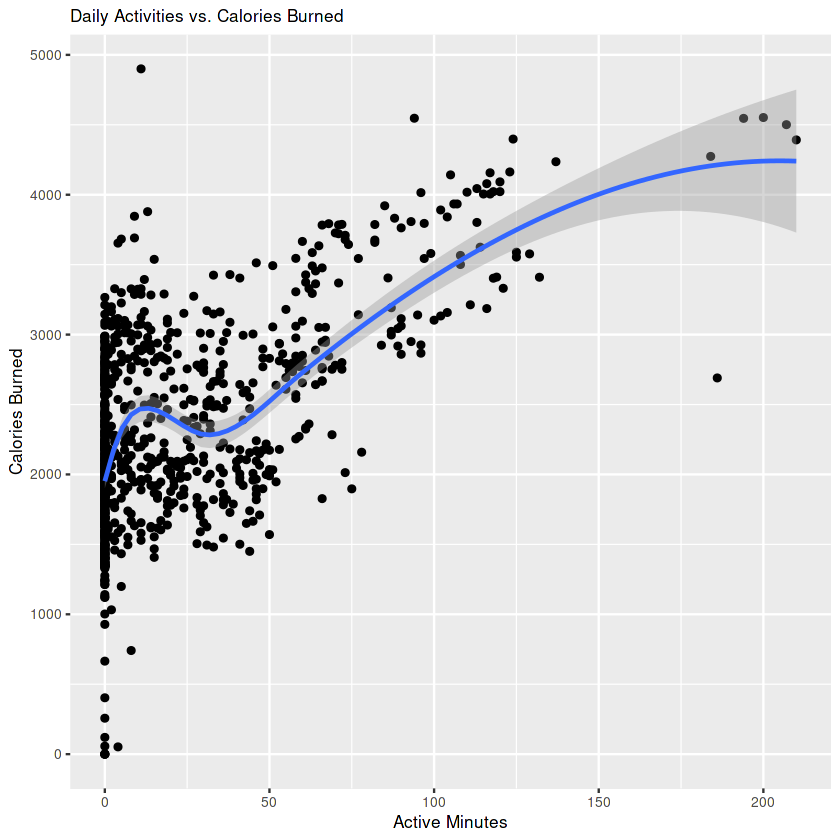

In [20]:
# Plotting a graph to know the realtion between daily activites and calories burned.
ggplot(total_daily_activity, aes(x = VeryActiveMinutes, y = Calories))+
  geom_point()+
  geom_smooth()+
  labs(title="Daily Activities vs. Calories Burned", x= "Active Minutes", y="Calories Burned")+
  theme(plot.title = element_text(size=10), text = element_text(size=10))

* There is a positive correlation between activity and calories burned. The more active minutes recorded by participants,the more total calories burned.

### 5. Relationship between sleeping and calories burned

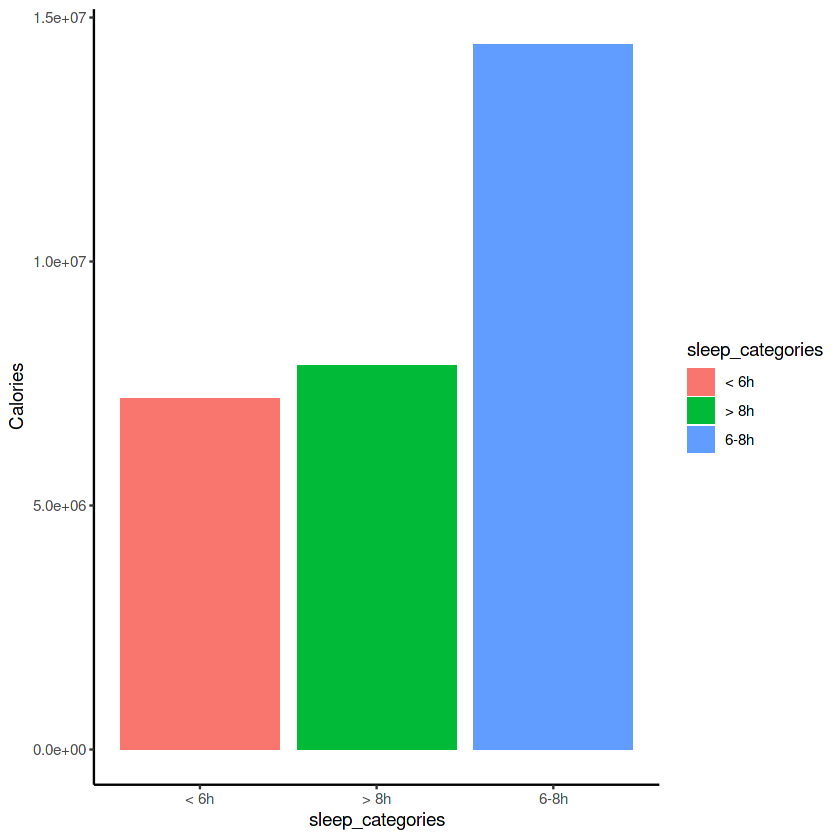

In [21]:
# Plotting a bar chart to know the realtions between sleeping and calories burned.
ggplot(combined_data, aes(x=sleep_categories, y=Calories, fill=sleep_categories)) +
  geom_bar(stat="identity")+theme_classic()

* Calories burned are more in pserons who sleep from 6-8 hours.

# 6. ACT

## Conclusions & Recommendations

1. Adding a new feature to the smart device to easily and automatically track daily weight and sleep records. The team should explain to consumers the advantages of keeping track of their sleep in order to achieve their weight-loss goals.
2. There is a clear relation between total daily activities and calories burned. Accordingly, using the smart device to log the daily activities can help in losing weight. 
3. In comparison to persons sleeping 6-8 hours a day, those who sleep less than 6 hours a day and people who sleep more than 8 hours a day burn fewer calories.
4. Bellabeat may add a new feature for the smart device to allow users to use app notifications to go to bed if they wish to improve their sleep.
5. Light active distance is better than moderate active distance for burning more calories. (conclusion from heatmap).
6. Collection of more data from Bellabeat's current users would be extremely helpful in gaining more accurate insights.
